<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S2 : Introducción a los Modelos de Previsión en Series Temporales

# 0. Objetivo

El objetivo de este challenge es realizar previsiones de series temporales, utilizando modelos sencillos para familiarizarnos con los principales conceptos de la modelización y previsión de variables

<img src="bicicletas_chicago_challenge.jpg" style="float:right; height: 250px"></img>
Vamos a seguir con el caso práctico de previsión sobre los alquileres de bicicletas de Chicago, pero en este caso vamos a realizar un estudio más a medio plazo, pues nos piden una previsión sobre cual va a ser el alquiler de bicicletas para los próximos **4 TRIMESTRES**. 

Para ello disponemos del histórico de alquileres de los últimos 7 años a nivel TRIMESTRAL.

Contesta a las diferentes preguntas que aparecen en el desarrollo.


## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe que incluya nuestro histórico y las fechas en las que queremos hacer la previsión.

No olvides que seguimos trabajando con series temporales, por lo que, tendremos una variable tiempo.

In [2]:
## Lectura de los datos
data_path = 'year_q_chicago.csv'
df_datos = pd.read_csv(data_path)

In [3]:
## Revisión de los datos
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
cnt     28 non-null int64
date    28 non-null object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [4]:
df_datos.tail()

cnt        date
23  1130918  2016-12-31
24  1106201  2017-03-31
25  1514973  2017-06-30
26  2067336  2017-09-30
27  1303435  2017-12-31

In [5]:
## Creamos un campo fecha
df_datos['date'] = pd.to_datetime(df_datos['date'], format='%Y-%m-%d')

In [6]:
## Creamos un dataframe con el histórico
df_chicago = pd.DataFrame(df_datos['cnt'].tolist(),
                             index = df_datos['date'].tolist(),
                             columns = ['cnt'])
df_chicago

cnt
2011-03-31   217543
2011-06-30   285236
2011-09-30   466163
2011-12-31   254159
2012-03-31   358675
2012-06-30   476774
2012-09-30   708591
2012-12-31   445534
2013-03-31   503706
2013-06-30   693602
2013-09-30  1009371
2013-12-31   601644
2014-03-31   669587
2014-06-30   858011
2014-09-30  1260544
2014-12-31   786641
2015-03-31   808013
2015-06-30  1195874
2015-09-30  1517170
2015-12-31   944730
2016-03-31   953109
2016-06-30  1282791
2016-09-30  1788092
2016-12-31  1130918
2017-03-31  1106201
2017-06-30  1514973
2017-09-30  2067336
2017-12-31  1303435

Recordemos que vamos a realizar la predicción sobre los **4 trimestres** siguientes.

In [7]:
## Periodos en los que vamos a hacer la predicción
periodos = pd.date_range('2018-03-31', periods = 4, freq = 'Q')
periodos

DatetimeIndex(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
## Creamos un dataframe con nuestras fechas a predecir
df_prediccion = pd.DataFrame({'cnt':[np.nan,np.nan,np.nan,np.nan]},
                             index = periodos)
df_prediccion

cnt
2018-03-31  NaN
2018-06-30  NaN
2018-09-30  NaN
2018-12-31  NaN

In [9]:
## Unimos el dataframe del histórico y el de la predicción
df_alquileres = pd.concat([df_chicago, df_prediccion], ignore_index = False)
df_alquileres

cnt
2011-03-31   217543.0
2011-06-30   285236.0
2011-09-30   466163.0
2011-12-31   254159.0
2012-03-31   358675.0
2012-06-30   476774.0
2012-09-30   708591.0
2012-12-31   445534.0
2013-03-31   503706.0
2013-06-30   693602.0
2013-09-30  1009371.0
2013-12-31   601644.0
2014-03-31   669587.0
2014-06-30   858011.0
2014-09-30  1260544.0
2014-12-31   786641.0
2015-03-31   808013.0
2015-06-30  1195874.0
2015-09-30  1517170.0
2015-12-31   944730.0
2016-03-31   953109.0
2016-06-30  1282791.0
2016-09-30  1788092.0
2016-12-31  1130918.0
2017-03-31  1106201.0
2017-06-30  1514973.0
2017-09-30  2067336.0
2017-12-31  1303435.0
2018-03-31        NaN
2018-06-30        NaN
2018-09-30        NaN
2018-12-31        NaN

## 2. Componentes de la serie temporal

Representa la serie resultante.

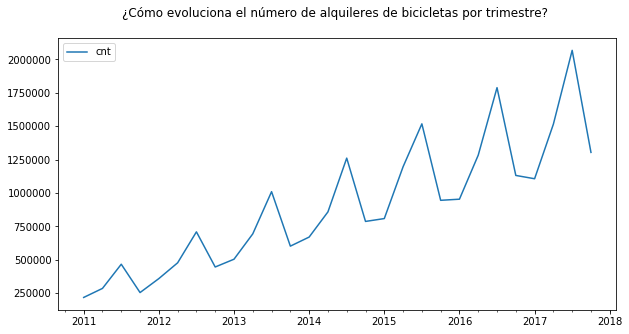

In [10]:
## Representamos la serie temporal
df_alquileres.plot(figsize=(10,5),
                  title='¿Cómo evoluciona el número de alquileres de bicicletas por trimestre? \n')

##### *P: ¿Qué componentes de una serie temporal tiene el alquiler de bicicletas?*

Estacionalidad y tendencia

## 3. Predicciones sobre la serie temporal

Para realizar nuestra predicción vamos a reutilizar los tres modelos que hemos usado en el desarrollo del worksheet:

Modelo 1: *Mi previsión de alquileres = Alquileres último dato*

Modelo 2: *Mi previsión de alquileres = Alquileres último dato + la variación del último dato*

Modelo 3: *Mi previsión de alquileres = Media de TODOS los alquileres*

### 3.1.- Modelo 1

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Alquileres último año (en este caso trimestre)

In [11]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M1'] = np.nan
## Igualamos los valores de nuestras previsiones al del último trimestre 
df_alquileres['prevision_M1'][-5:] = df_alquileres['cnt'][-5]
df_alquileres

cnt  prevision_M1
2011-03-31   217543.0           NaN
2011-06-30   285236.0           NaN
2011-09-30   466163.0           NaN
2011-12-31   254159.0           NaN
2012-03-31   358675.0           NaN
2012-06-30   476774.0           NaN
2012-09-30   708591.0           NaN
2012-12-31   445534.0           NaN
2013-03-31   503706.0           NaN
2013-06-30   693602.0           NaN
2013-09-30  1009371.0           NaN
2013-12-31   601644.0           NaN
2014-03-31   669587.0           NaN
2014-06-30   858011.0           NaN
2014-09-30  1260544.0           NaN
2014-12-31   786641.0           NaN
2015-03-31   808013.0           NaN
2015-06-30  1195874.0           NaN
2015-09-30  1517170.0           NaN
2015-12-31   944730.0           NaN
2016-03-31   953109.0           NaN
2016-06-30  1282791.0           NaN
2016-09-30  1788092.0           NaN
2016-12-31  1130918.0           NaN
2017-03-31  1106201.0           NaN
2017-06-30  1514973.0           NaN
2017-09-30  2067336.0           NaN
2017-12-31  1303435.0     1303435.0
2018-03-31        NaN     1303435.0
2018-06-30        NaN     1303435.0
2018-09-30        NaN     1303435.0
2018-12-31        NaN     1303435.0

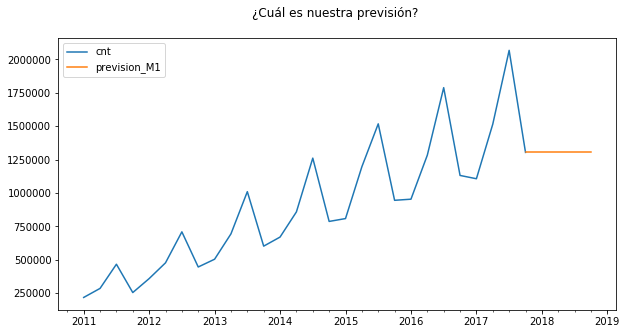

In [12]:
## Representamos el resultado
df_alquileres.plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

##### *P: ¿Qué le pasa a mi previsión? ¿cómo podría mejorarla?*

No está teniendo en cuenta ni la estacionalidad ni la tendencia.

### 3.2.- Modelo 2

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Alquileres último dato + la variación del último dato

In [13]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['cnt_shift'] = df_alquileres['cnt'].shift(1)
## Calculamos la variación del trimestre actual con el anterior
df_alquileres['variacion'] = df_alquileres['cnt'] - df_alquileres['cnt_shift']
df_alquileres['variacion'] = df_alquileres['variacion'].fillna(method='ffill')

## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M2'] = np.nan
## Restamos el valor de la varianza a nuestra previsión anterior (será una resta acumulativa)
df_alquileres['prevision_M2'][-4:] = df_alquileres['variacion'][-4:].cumsum() +\
                                     df_alquileres['prevision_M1'][-4:]
df_alquileres['prevision_M2'][-5] = df_alquileres['cnt'][-5]
df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2
2011-03-31   217543.0           NaN        NaN        NaN           NaN
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0

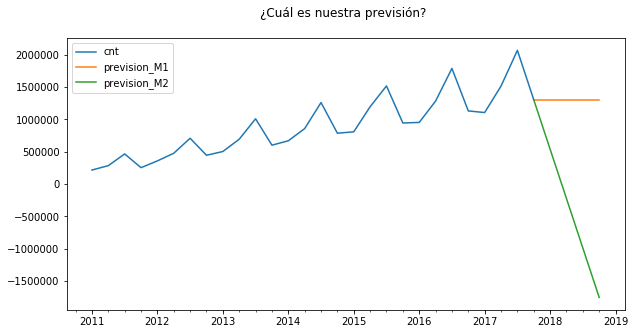

In [14]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','prevision_M1','prevision_M2']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

#### *P: ¿Si comparamos las previsiones del M1 y el M2 en qué se diferencian?*

En este caso tenemos también estacionalidad,por tanto, la previsión que obtenemos no es la deseada ya que nos está afectando la tendencia y estacionalidad del último valor.

Sin embargo, se puede observar que eligiendo una previsión en base a la media, obtenemos un mejor resultado, ya que haciendo la media tenemos un comportamiento más cercano a la realidad que usando el M2.

### Modelo 3

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Media de TODOS los alquileres

In [15]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M3'] = np.nan
df_alquileres['prevision_M3'][-5] = df_alquileres['cnt'][-5]
## Calculamos la media de los alquileres y lo asignamos a los últimos trimestres
df_alquileres['prevision_M3'][-4:] = df_alquileres['cnt'].mean()
df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2  \
2011-03-31   217543.0           NaN        NaN        NaN           NaN   
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN   
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN   
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN   
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN   
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN   
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN   
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN   
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN   
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN   
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN   
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN   
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN   
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN   
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN   
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN   
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN   
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN   
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN   
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN   
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN   
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN   
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN   
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN   
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN   
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN   
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN   
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0   
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0   
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0   
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0   
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0   

            prevision_M3  
2011-03-31           NaN  
2011-06-30           NaN  
2011-09-30           NaN  
2011-12-31           NaN  
2012-03-31           NaN  
2012-06-30           NaN  
2012-09-30           NaN  
2012-12-31           NaN  
2013-03-31           NaN  
2013-06-30           NaN  
2013-09-30           NaN  
2013-12-31           NaN  
2014-03-31           NaN  
2014-06-30           NaN  
2014-09-30           NaN  
2014-12-31           NaN  
2015-03-31           NaN  
2015-06-30           NaN  
2015-09-30           NaN  
2015-12-31           NaN  
2016-03-31           NaN  
2016-06-30           NaN  
2016-09-30           NaN  
2016-12-31           NaN  
2017-03-31           NaN  
2017-06-30           NaN  
2017-09-30           NaN  
2017-12-31  1.303435e+06  
2018-03-31  9.003008e+05  
2018-06-30  9.003008e+05  
2018-09-30  9.003008e+05  
2018-12-31  9.003008e+05

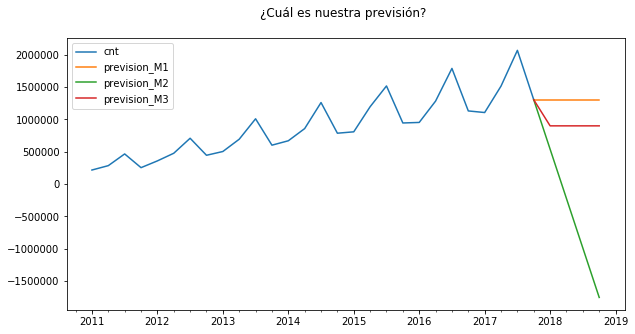

In [16]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','prevision_M1','prevision_M2','prevision_M3']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

#### *P: ¿Qué le ha pasado ahora a mi previsión para el M3?*

Ha empeorado respecto a M1 ya que estamos eligiendo la media de todos los valores durante el tiempo y al tener una estacionalidad y una tendencia bastantes definidas, los valores de la media no son realistas.

#### *P: ¿Cómo podría mejorar mi previsión del M3?*

Teniendo en cuenta la tendencia y estacionalidad de la serie temporal.

#### *P: ¿Qué modelo elegirías el M1, el M2 o el M3? ¿Por qué?*

El modelo M1 ya que es el que más se aproxima a la realidad de la serie.

## 4. Predicciones mejoradas sobre la serie temporal

Para realizar las predicciones vamos a eliminar primero las componentes de la serie temporal, de manera que calculemos nuestra previsión sobre el residuo.

### 4.1.-  Eliminar las componentes de la serie: estacionalidad y tendencia

#### a) Elimina la estacionalidad y representa los resultados.

##### *P: ¿Cómo podemos eliminar la estacionalidad? ¿Qué ventana móvil debemos usar? ¿Por qué?*

Tenemos que usar una ventana móvil de longitud 4, ya la estacionalidad es anual y hay cuatro trimestres/año

In [17]:
## Eliminamos la estacionalidad de la serie
ventana = 4
df_alquileres['cnt_mm4'] = df_alquileres['cnt'].rolling(ventana).mean()

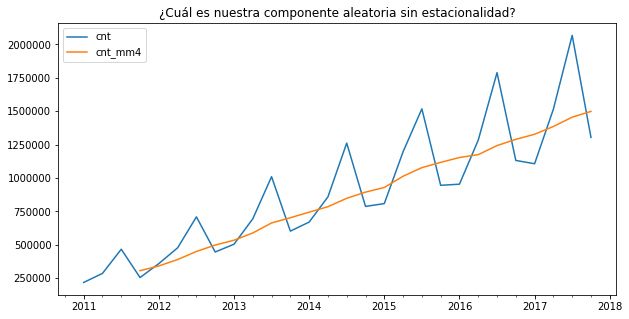

In [18]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','cnt_mm4']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra componente aleatoria sin estacionalidad?')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e8848d0>,
      dtype=object)

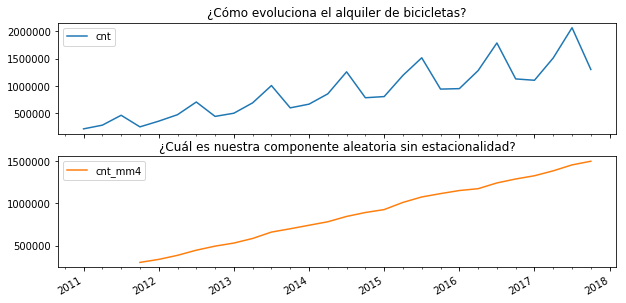

In [19]:
df_alquileres.loc[:,['cnt','cnt_mm4']].plot(figsize = (10,5),
                                                 subplots = True,
                                                 title = ['¿Cómo evoluciona el alquiler de bicicletas?',
                                                          '¿Cuál es nuestra componente aleatoria sin estacionalidad?'])

#### b) Elimina la tendencia y representa los resultados.

##### *P: ¿Cómo podemos eliminar la tendencia?*

In [20]:
## Eliminamos la tendencia
df_alquileres['cnt_mm4_st'] = df_alquileres['cnt_mm4'] - df_alquileres['cnt_mm4'].shift(1)


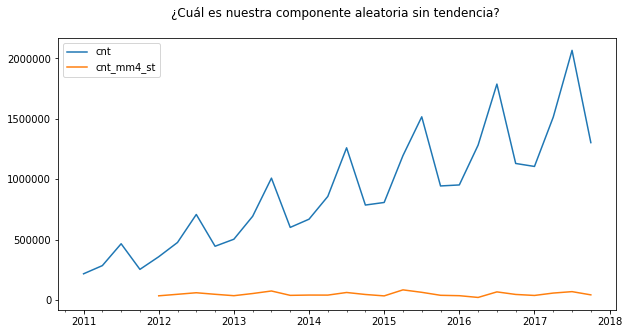

In [21]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','cnt_mm4_st']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra componente aleatoria sin tendencia? \n')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ead1b00>,
      dtype=object)

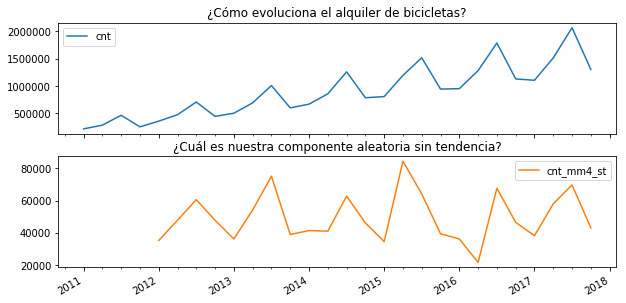

In [22]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','cnt_mm4_st']].plot(figsize=(10,5),
                                               subplots=True,
                                               title=['¿Cómo evoluciona el alquiler de bicicletas?',
                                                          '¿Cuál es nuestra componente aleatoria sin tendencia?'])

### 4.2.-  Realizar la previsión

Realiza la previsión sobre la componente aleatoria. Utiliza alguno de los modelos que hemos visto y representa los resultados.

In [23]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M3b'] = np.nan
## Calculamos la media y lo asignamos a los últimos trimestres
df_alquileres['prevision_M3b'][-4:] = df_alquileres['cnt_mm4_st'].mean()
df_alquileres['prevision_M3b'][-5] = df_alquileres['cnt'][-5]
df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2  \
2011-03-31   217543.0           NaN        NaN        NaN           NaN   
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN   
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN   
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN   
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN   
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN   
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN   
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN   
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN   
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN   
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN   
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN   
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN   
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN   
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN   
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN   
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN   
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN   
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN   
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN   
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN   
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN   
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN   
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN   
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN   
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN   
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN   
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0   
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0   
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0   
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0   
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0   

            prevision_M3     cnt_mm4  cnt_mm4_st  prevision_M3b  
2011-03-31           NaN         NaN         NaN            NaN  
2011-06-30           NaN         NaN         NaN            NaN  
2011-09-30           NaN         NaN         NaN            NaN  
2011-12-31           NaN   305775.25         NaN            NaN  
2012-03-31           NaN   341058.25    35283.00            NaN  
2012-06-30           NaN   388942.75    47884.50            NaN  
2012-09-30           NaN   449549.75    60607.00            NaN  
2012-12-31           NaN   497393.50    47843.75            NaN  
2013-03-31           NaN   533651.25    36257.75            NaN  
2013-06-30           NaN   587858.25    54207.00            NaN  
2013-09-30           NaN   663053.25    75195.00            NaN  
2013-12-31           NaN   702080.75    39027.50            NaN  
2014-03-31           NaN   743551.00    41470.25            NaN  
2014-06-30           NaN   784653.25    41102.25            NaN  
2014-09-30           NaN   847446.50    62793.25            NaN  
2014-12-31           NaN   893695.75    46249.25            NaN  
2015-03-31           NaN   928302.25    34606.50            NaN  
2015-06-30           NaN  1012768.00    84465.75            NaN  
2015-09-30           NaN  1076924.50    64156.50            NaN  
2015-12-31           NaN  1116446.75    39522.25            NaN  
2016-03-31           NaN  1152720.75    36274.00            NaN  
2016-06-30           NaN  1174450.00    21729.25            NaN  
2016-09-30           NaN

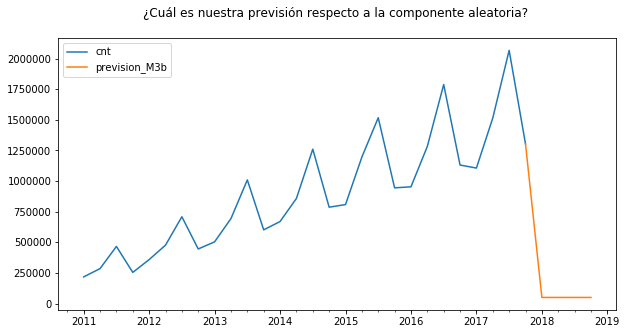

In [24]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión respecto a la componente aleatoria? \n')

#### *P: Esta previsión, ¿qué significa? ¿cómo lo puedo convertir en un número que se parezca a mis alquileres?*

Como estamos haciendo la previsión sin tener en cuenta la tendencia ni la estacionalidad de la serie, los valores obtenidos no son realistas.

### 4.3.-  Incorporar las componentes de la serie: estacionalidad y tendencia

#### a) Incorpora la tendencia a la previsión de alquileres y representa los resultados.

In [25]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_alquileres['prevision_M3b_ct']=np.nan
## Toma la variación de la serie sin estacionalidad
df_alquileres['prevision_M3b_ct'][-5] = df_alquileres['cnt'][-5]
df_alquileres['cnt_mm4']=df_alquileres['cnt_mm4'].fillna(method='ffill')
df_alquileres['prevision_M3b_ct'][-4:] = df_alquileres['prevision_M3b'][-4:].cumsum()\
                                      + df_alquileres['cnt_mm4'][-4:]

df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2  \
2011-03-31   217543.0           NaN        NaN        NaN           NaN   
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN   
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN   
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN   
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN   
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN   
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN   
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN   
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN   
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN   
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN   
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN   
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN   
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN   
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN   
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN   
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN   
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN   
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN   
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN   
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN   
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN   
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN   
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN   
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN   
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN   
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN   
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0   
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0   
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0   
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0   
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0   

            prevision_M3     cnt_mm4  cnt_mm4_st  prevision_M3b  \
2011-03-31           NaN         NaN         NaN            NaN   
2011-06-30           NaN         NaN         NaN            NaN   
2011-09-30           NaN         NaN         NaN            NaN   
2011-12-31           NaN   305775.25         NaN            NaN   
2012-03-31           NaN   341058.25    35283.00            NaN   
2012-06-30           NaN   388942.75    47884.50            NaN   
2012-09-30           NaN   449549.75    60607.00            NaN   
2012-12-31           NaN   497393.50    47843.75            NaN   
2013-03-31           NaN   533651.25    36257.75            NaN   
2013-06-30           NaN   587858.25    54207.00            NaN   
2013-09-30           NaN   663053.25    75195.00            NaN   
2013-12-31           NaN   702080.75    39027.50            NaN   
2014-03-31           NaN   743551.00    41470.25            NaN   
2014-06-30           NaN   784653.25    41102.25            NaN   
2014-09-30           NaN   847446.50    62793.25            NaN   
2014-12-31           NaN   893695.75    46249.25            NaN   
2015-03-31           NaN   928302.25    34606.50            NaN   
2015-06-30           NaN  1012768.00    84465.75            NaN   
2015-09-30           NaN  1076924.50    64156.50            NaN   
2015-12-31           NaN  1116446.75    39522.25            NaN   
2016-03-31           NaN  1152720.75    36274.00            NaN   
2016-06-30           NaN  1174450.00    21729.25            NaN   
2

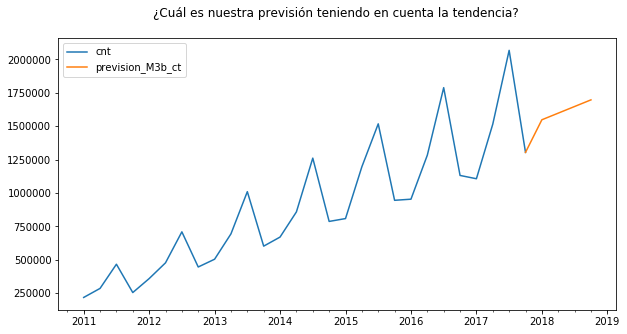

In [26]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b_ct']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión teniendo en cuenta la tendencia? \n')

#### b) Incorpora la estacionalidad a la previsión de alquileres y representa los resultados.

Una forma sencilla sería calcular los coeficientes de estacionalidad vs la serie de media móvil y aplicar los últimos coeficientes ( o una media, ...) a mis previsiones para incorporar la estacionalidad.

In [27]:
## Calculamos los coeficientes de estacionalidad
df_alquileres['media_movil'] = df_alquileres['cnt'].rolling(4).mean()
df_alquileres['coef_estac'] = df_alquileres['cnt']/df_alquileres['media_movil']

df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2  \
2011-03-31   217543.0           NaN        NaN        NaN           NaN   
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN   
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN   
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN   
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN   
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN   
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN   
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN   
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN   
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN   
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN   
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN   
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN   
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN   
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN   
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN   
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN   
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN   
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN   
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN   
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN   
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN   
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN   
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN   
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN   
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN   
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN   
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0   
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0   
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0   
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0   
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0   

            prevision_M3     cnt_mm4  cnt_mm4_st  prevision_M3b  \
2011-03-31           NaN         NaN         NaN            NaN   
2011-06-30           NaN         NaN         NaN            NaN   
2011-09-30           NaN         NaN         NaN            NaN   
2011-12-31           NaN   305775.25         NaN            NaN   
2012-03-31           NaN   341058.25    35283.00            NaN   
2012-06-30           NaN   388942.75    47884.50            NaN   
2012-09-30           NaN   449549.75    60607.00            NaN   
2012-12-31           NaN   497393.50    47843.75            NaN   
2013-03-31           NaN   533651.25    36257.75            NaN   
2013-06-30           NaN   587858.25    54207.00            NaN   
2013-09-30           NaN   663053.25    75195.00            NaN   
2013-12-31           NaN   702080.75    39027.50            NaN   
2014-03-31           NaN   743551.00    41470.25            NaN   
2014-06-30           NaN   784653.25    41102.25            NaN   
2014-09-30           NaN   847446.50    62793.25            NaN   
2014-12-31           NaN   893695.75    46249.25            NaN   
2015-03-31           NaN   928302.25    34606.50            NaN   
2015-06-30           NaN  1012768.00    84465.75            NaN   
2015-09-30           NaN  1076924.50    64156.50            NaN   
2015-12-31           NaN  1116446.75    39522.25            NaN   
2016-03-31           NaN  1152720.75    36274.00            NaN   
2016-06-30           NaN  1174450.00    21729.25            NaN   
2

In [28]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
## Como queremos la previsión para 4 trimestres, desplazamos esos coeficientes y los multiplicamos por 
## el valor de la previsión con tendencia
df_alquileres['prevision_M3b_ct_cs'] = df_alquileres['prevision_M3b_ct']  \
                                     * df_alquileres['coef_estac'].shift(4)
df_alquileres['prevision_M3b_ct_cs'][-5] = df_alquileres['cnt'][-5]
df_alquileres

cnt  prevision_M1  cnt_shift  variacion  prevision_M2  \
2011-03-31   217543.0           NaN        NaN        NaN           NaN   
2011-06-30   285236.0           NaN   217543.0    67693.0           NaN   
2011-09-30   466163.0           NaN   285236.0   180927.0           NaN   
2011-12-31   254159.0           NaN   466163.0  -212004.0           NaN   
2012-03-31   358675.0           NaN   254159.0   104516.0           NaN   
2012-06-30   476774.0           NaN   358675.0   118099.0           NaN   
2012-09-30   708591.0           NaN   476774.0   231817.0           NaN   
2012-12-31   445534.0           NaN   708591.0  -263057.0           NaN   
2013-03-31   503706.0           NaN   445534.0    58172.0           NaN   
2013-06-30   693602.0           NaN   503706.0   189896.0           NaN   
2013-09-30  1009371.0           NaN   693602.0   315769.0           NaN   
2013-12-31   601644.0           NaN  1009371.0  -407727.0           NaN   
2014-03-31   669587.0           NaN   601644.0    67943.0           NaN   
2014-06-30   858011.0           NaN   669587.0   188424.0           NaN   
2014-09-30  1260544.0           NaN   858011.0   402533.0           NaN   
2014-12-31   786641.0           NaN  1260544.0  -473903.0           NaN   
2015-03-31   808013.0           NaN   786641.0    21372.0           NaN   
2015-06-30  1195874.0           NaN   808013.0   387861.0           NaN   
2015-09-30  1517170.0           NaN  1195874.0   321296.0           NaN   
2015-12-31   944730.0           NaN  1517170.0  -572440.0           NaN   
2016-03-31   953109.0           NaN   944730.0     8379.0           NaN   
2016-06-30  1282791.0           NaN   953109.0   329682.0           NaN   
2016-09-30  1788092.0           NaN  1282791.0   505301.0           NaN   
2016-12-31  1130918.0           NaN  1788092.0  -657174.0           NaN   
2017-03-31  1106201.0           NaN  1130918.0   -24717.0           NaN   
2017-06-30  1514973.0           NaN  1106201.0   408772.0           NaN   
2017-09-30  2067336.0           NaN  1514973.0   552363.0           NaN   
2017-12-31  1303435.0     1303435.0  2067336.0  -763901.0     1303435.0   
2018-03-31        NaN     1303435.0  1303435.0  -763901.0      539534.0   
2018-06-30        NaN     1303435.0        NaN  -763901.0     -224367.0   
2018-09-30        NaN     1303435.0        NaN  -763901.0     -988268.0   
2018-12-31        NaN     1303435.0        NaN  -763901.0    -1752169.0   

            prevision_M3     cnt_mm4  cnt_mm4_st  prevision_M3b  \
2011-03-31           NaN         NaN         NaN            NaN   
2011-06-30           NaN         NaN         NaN            NaN   
2011-09-30           NaN         NaN         NaN            NaN   
2011-12-31           NaN   305775.25         NaN            NaN   
2012-03-31           NaN   341058.25    35283.00            NaN   
2012-06-30           NaN   388942.75    47884.50            NaN   
2012-09-30           NaN   449549.75    60607.00            NaN   
2012-12-31           NaN   497393.50    47843.75            NaN   
2013-03-31           NaN   533651.25    36257.75            NaN   
2013-06-30           NaN   587858.25    54207.00            NaN   
2013-09-30           NaN   663053.25    75195.00            NaN   
2013-12-31           NaN   702080.75    39027.50            NaN   
2014-03-31           NaN   743551.00    41470.25            NaN   
2014-06-30           NaN   784653.25    41102.25            NaN   
2014-09-30           NaN   847446.50    62793.25            NaN   
2014-12-31           NaN   893695.75    46249.25            NaN   
2015-03-31           NaN   928302.25    34606.50            NaN   
2015-06-30           NaN  1012768.00    84465.75            NaN   
2015-09-30           NaN  1076924.50    64156.50            NaN   
2015-12-31           NaN  1116446.75    39522.25            NaN   
2016-03-31           NaN  1152720.75    36274.00            NaN   
2016-06-30           NaN  1174450.00    21729.25            NaN   
2

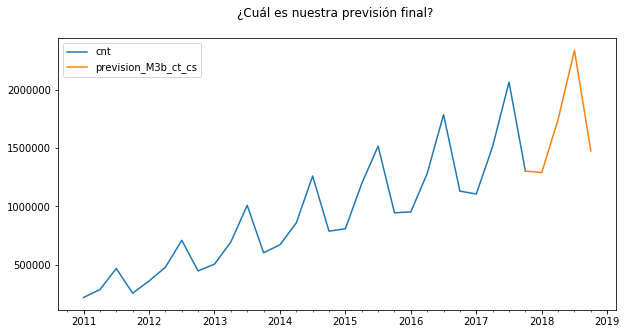

In [29]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b_ct_cs']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión final? \n')

Como podemos observar, al añadirle el efecto de la estacionalidad a la previsión anterior (que ya tenía añadido el efecto de la tendencia), la previsión final que obtenemos es bastante realista.